This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

#from:  chapter04_getting-started-with-neural-networks

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [4]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


Shua-- Note: This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). 1 = Positive, 0 = Negative

**Decoding reviews back to text**

In [5]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in train_data[0]] )
print(decoded) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Shua: Lets see another example, with the indices

In [6]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in train_data[50]] )
print(train_data[50])
print(decoded) 

[1, 13, 165, 219, 14, 20, 33, 6, 750, 17, 515, 17, 13, 2675, 4, 2, 61, 278, 59, 301, 107, 715, 13, 69, 115, 557, 33, 6, 750, 159, 42, 237, 57, 2, 17, 515, 17, 13, 557, 148, 715, 13, 144, 28, 43, 2, 5458, 5458, 8, 61, 2208, 5, 825, 344, 21, 57, 2, 13, 435, 11, 5, 296, 4, 20, 14, 20, 161, 97, 259, 11, 4, 750, 462, 24, 60, 280, 24, 60, 2, 669, 75, 1829, 50, 11, 5023, 3542, 175, 747, 234, 42, 38, 294, 62, 7799, 14, 20, 1870, 4, 311, 62, 6144, 2, 95, 870, 50, 11, 5023, 1100, 3542, 18, 160, 747, 234]
# i actually saw this movie at a theater as soon as i handed the # my money she said two words i had never heard at a theater before or since no # as soon as i heard those words i should have just # bye bye to my cash and gone home but no # i went in and watched the movie this movie didn't make anyone in the theater laugh not even once not even # mostly we sat there in stunned silence every ten minutes or so someone would yell this movie sucks the audience would applaud # then sit there in stunn

In [7]:
max([max(sequence) for sequence in train_data])

9999

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**


Shua-- Multi-hot encoding is a way to represent categorical data as binary vectors. 
       This can be done by creating a vector of all zeros and then setting specific indices to 1's.
https://stats.stackexchange.com/questions/467633/what-exactly-is-multi-hot-encoding-and-how-is-it-different-from-one-hot

Note: the more common use case is in multi-label classification where each label is independent of each other.

In [8]:
#Shua-- Multi-hot encoding is a way to represent categorical data as binary vectors. 
#       This can be done by creating a vector of all zeros and then setting specific indices to 1's.
# https://stats.stackexchange.com/questions/467633/what-exactly-is-multi-hot-encoding-and-how-is-it-different-from-one-hot

# Note: the more common use case is in multi-label classification where each label is independent of each other.

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

##Below four sigmoids in last layers; in our model there's only one. Each sigmoid is like the "logistic regression" from ML

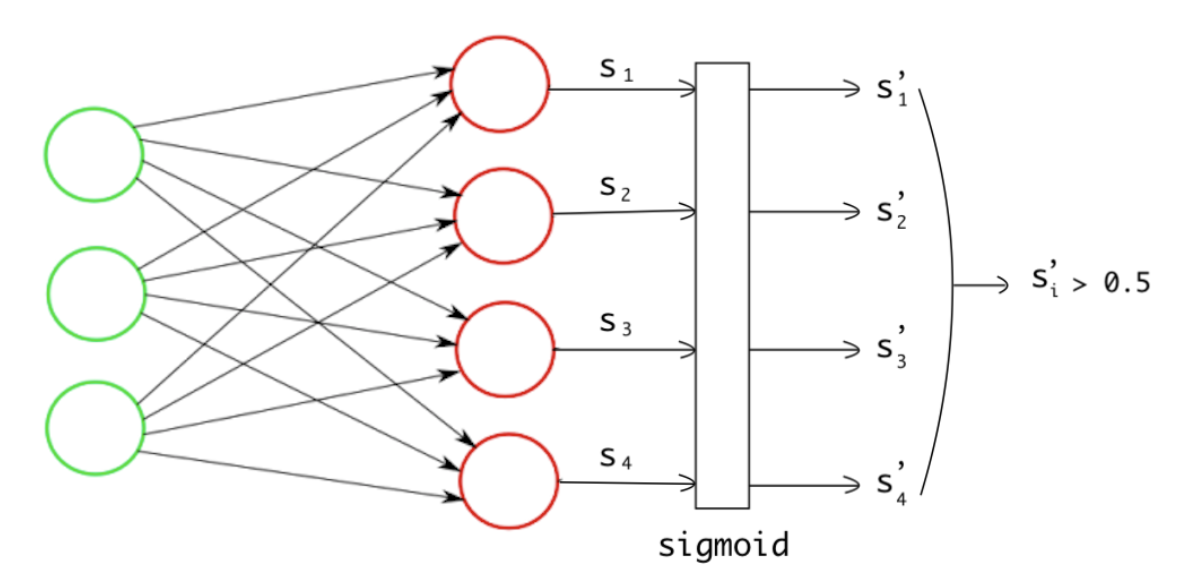

In [13]:
input_shape = x_train.shape  
model.build(input_shape) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (25000, 16)               160016    
                                                                 
 dense_1 (Dense)             (25000, 16)               272       
                                                                 
 dense_2 (Dense)             (25000, 1)                17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Think on the Number of parameters
###16*10000+16 = 160016
###16*16+16 = 272

**Compiling the model**

In [14]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
#Shua: Above isn't the best way to do a train test split. Lets do a nother one, where we can better shuffle the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

**Training your model**

In [17]:
# history = model.fit(partial_x_train,
#                     partial_y_train,
#                     epochs=20,
#                     batch_size=512,
#                     validation_data=(x_val, y_val))
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test)
)


Epoch 1/20
40/40 [==============================] - 3s 31ms/step - loss: 0.5301 - accuracy: 0.7740 - val_loss: 0.4595 - val_accuracy: 0.7844
Epoch 2/20
40/40 [==============================] - 1s 14ms/step - loss: 0.3233 - accuracy: 0.8916 - val_loss: 0.3104 - val_accuracy: 0.8830
Epoch 3/20
40/40 [==============================] - 1s 13ms/step - loss: 0.2434 - accuracy: 0.9163 - val_loss: 0.2862 - val_accuracy: 0.8800
Epoch 4/20
40/40 [==============================] - 1s 13ms/step - loss: 0.1981 - accuracy: 0.9322 - val_loss: 0.2873 - val_accuracy: 0.8794
Epoch 5/20
40/40 [==============================] - 1s 14ms/step - loss: 0.1705 - accuracy: 0.9413 - val_loss: 0.2794 - val_accuracy: 0.8854
Epoch 6/20
40/40 [==============================] - 1s 14ms/step - loss: 0.1495 - accuracy: 0.9478 - val_loss: 0.2987 - val_accuracy: 0.8810
Epoch 7/20
40/40 [==============================] - 1s 13ms/step - loss: 0.1309 - accuracy: 0.9567 - val_loss: 0.3091 - val_accuracy: 0.8770
Epoch 8/20
40

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

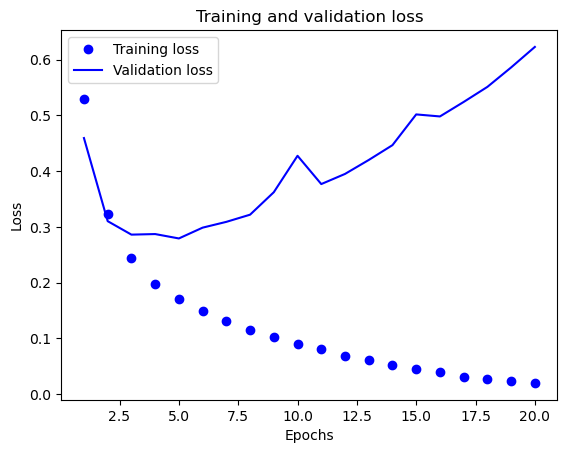

In [19]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

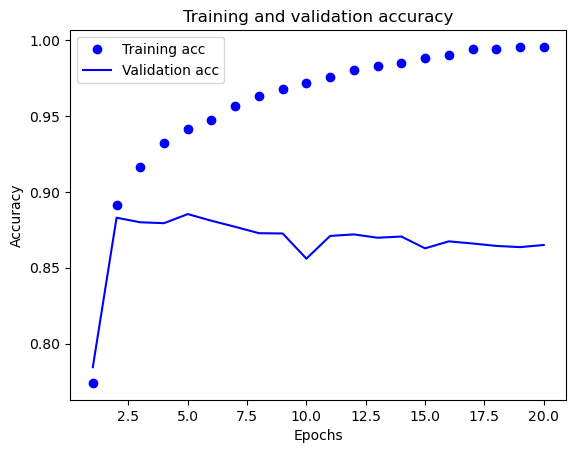

In [20]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Shua-- We can see from this graph that that the model heavily overfits the data to the training set very early on.

**Retraining a model from scratch:  4 epochs seem to be enough**

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
40/40 [==============================] - 1s 10ms/step - loss: 0.5239 - accuracy: 0.7930
Epoch 2/4
40/40 [==============================] - 0s 11ms/step - loss: 0.3262 - accuracy: 0.8975
Epoch 3/4
40/40 [==============================] - 0s 11ms/step - loss: 0.2417 - accuracy: 0.9207
Epoch 4/4
157/157 [==============================] - 1s 2ms/step - loss: 0.2783 - accuracy: 0.8874


In [22]:
results

[0.2782692611217499, 0.8873999714851379]

### Using a trained model to generate predictions on new data

In [23]:
model.predict(x_test)

157/157 [==============================] - 0s 2ms/step


array([[0.02350715],
       [0.9859831 ],
       [0.2481006 ],
       ...,
       [0.20898208],
       [0.1622232 ],
       [0.79763436]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [24]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [25]:
len(train_data)

8982

In [26]:
len(test_data)

2246

In [27]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


**Decoding newswires back to text**

In [28]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [29]:
print(train_labels[10])
print(decoded_newswire)

3
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


### Preparing the data

**Encoding the input data**

In [30]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [31]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [32]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [33]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

##Know the softmax: the multiclass logistic regression

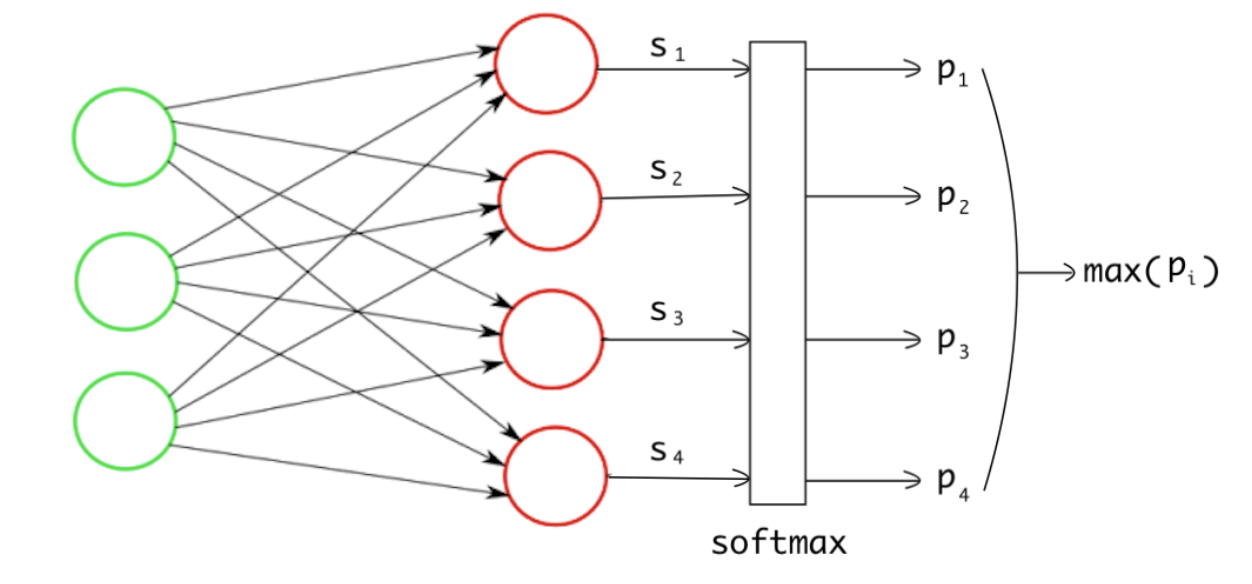

In [34]:
input_shape = x_train.shape  
model.build(input_shape) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (8982, 64)                640064    
                                                                 
 dense_7 (Dense)             (8982, 64)                4160      
                                                                 
 dense_8 (Dense)             (8982, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**

In [35]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [36]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

**Training the model**

In [37]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
15/15 [==============================] - 2s 51ms/step - loss: 2.5017 - accuracy: 0.5027 - val_loss: 1.7246 - val_accuracy: 0.5999
Epoch 2/20
15/15 [==============================] - 0s 26ms/step - loss: 1.4946 - accuracy: 0.6603 - val_loss: 1.4049 - val_accuracy: 0.6934
Epoch 3/20
15/15 [==============================] - 0s 27ms/step - loss: 1.1887 - accuracy: 0.7293 - val_loss: 1.3054 - val_accuracy: 0.6967
Epoch 4/20
15/15 [==============================] - 0s 26ms/step - loss: 0.9806 - accuracy: 0.7783 - val_loss: 1.1321 - val_accuracy: 0.7412
Epoch 5/20
15/15 [==============================] - 0s 26ms/step - loss: 0.8218 - accuracy: 0.8186 - val_loss: 1.0633 - val_accuracy: 0.7641
Epoch 6/20
15/15 [==============================] - 0s 26ms/step - loss: 0.6960 - accuracy: 0.8480 - val_loss: 1.0309 - val_accuracy: 0.7735
Epoch 7/20
15/15 [==============================] - 0s 26ms/step - loss: 0.5865 - accuracy: 0.8756 - val_loss: 1.0397 - val_accuracy: 0.7624
Epoch 8/20
15

**Plotting the training and validation loss**

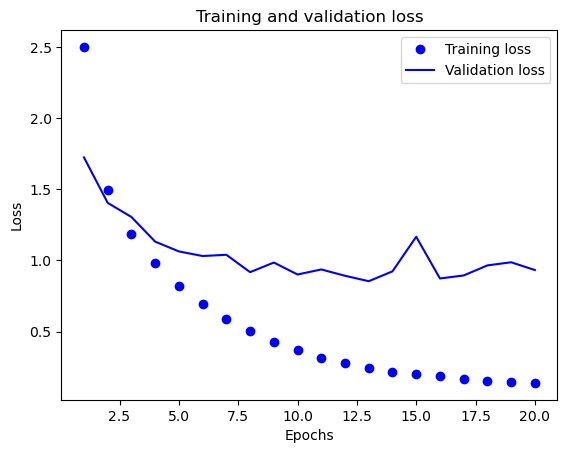

In [38]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

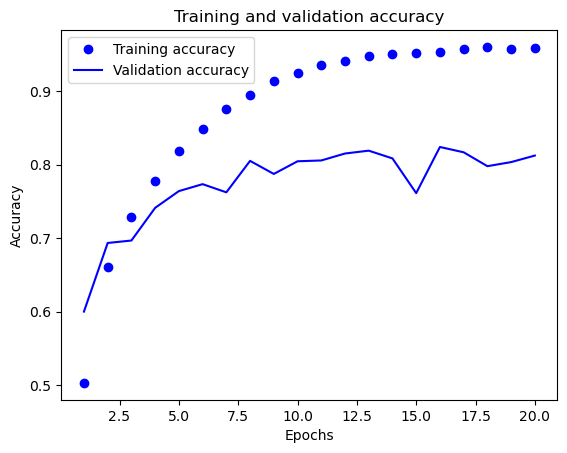

In [39]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Shua-- As opposed to the IMDB example, there doesn't seem to be any specific overfit to the validation set, however, the results do get stagnant pretty early on.
In this kind of situation,  a learning rate optimizier might be due. This perhaps would allow the gradients to move along more smoothly further down in the traning.

**Retraining a model from scratch**

In [40]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
15/15 [==============================] - 1s 21ms/step - loss: 2.9013 - accuracy: 0.3943
Epoch 2/9
15/15 [==============================] - 0s 22ms/step - loss: 1.6657 - accuracy: 0.6628
Epoch 3/9
15/15 [==============================] - 0s 20ms/step - loss: 1.2742 - accuracy: 0.7183
Epoch 4/9
15/15 [==============================] - 0s 21ms/step - loss: 1.0533 - accuracy: 0.7699
Epoch 5/9
15/15 [==============================] - 0s 22ms/step - loss: 0.8899 - accuracy: 0.8084
Epoch 6/9
15/15 [==============================] - 0s 21ms/step - loss: 0.7554 - accuracy: 0.8397
Epoch 7/9
15/15 [==============================] - 0s 20ms/step - loss: 0.6445 - accuracy: 0.8605
Epoch 8/9
15/15 [==============================] - 0s 20ms/step - loss: 0.5518 - accuracy: 0.8816
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9985 - accuracy: 0.7703


In [41]:
results

[0.9985172152519226, 0.7702582478523254]

In [42]:
# Code Explanation for this cell: This would be the results if we did random guessing
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()


0.18121104185218165

### Generating predictions on new data

In [43]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [44]:
predictions[0].shape

(46,)

In [45]:
np.sum(predictions[0])

1.0

In [46]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [47]:
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

#??

In [48]:
print(y_train[0])
print(train_labels[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3


In [49]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", #this is instead of the regular categorical_crossentropy
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [50]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"), #here, we shorten the network to just for neurons and create a bottleneck
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
57/57 [==============================] - 2s 17ms/step - loss: 3.4427 - accuracy: 0.2796 - val_loss: 3.1312 - val_accuracy: 0.4624
Epoch 2/20
57/57 [==============================] - 1s 11ms/step - loss: 2.9232 - accuracy: 0.4963 - val_loss: 2.8114 - val_accuracy: 0.5292
Epoch 3/20
57/57 [==============================] - 1s 12ms/step - loss: 2.6043 - accuracy: 0.4877 - val_loss: 2.5392 - val_accuracy: 0.3116
Epoch 4/20
57/57 [==============================] - 1s 12ms/step - loss: 2.2007 - accuracy: 0.3546 - val_loss: 2.1015 - val_accuracy: 0.3634
Epoch 5/20
57/57 [==============================] - 1s 11ms/step - loss: 1.5765 - accuracy: 0.5548 - val_loss: 1.4922 - val_accuracy: 0.6884
Epoch 6/20
57/57 [==============================] - 1s 12ms/step - loss: 1.1496 - accuracy: 0.7400 - val_loss: 1.3746 - val_accuracy: 0.6956
Epoch 7/20
57/57 [==============================] - 1s 11ms/step - loss: 1.0037 - accuracy: 0.7589 - val_loss: 1.3259 - val_accuracy: 0.7117
Epoch 8/20
57

Shua-- As we can see, pretty bad results when creating a bottleneck.

NOTE::: This isn't true across all architectures, and all areas. For example, Encoder-Decoder architectures in the Generative space inded utilize bottlenecks.


### Further experiments

In [51]:
model = keras.Sequential([
  layers.Dense(256, activation="relu"),
  layers.Dense(512, activation="relu"),
  layers.Dense(256, activation="relu"),
  layers.Dense(46, activation="softmax")
])
#add in an adam optimizer with an adaptive learning rate
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
model.compile(optimizer= keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=256,
          validation_data=(x_val, y_val)
          )

results = model.evaluate(x_test, y_test)
print(f'Results: {results}')

Epoch 1/20
29/29 [==============================] - 4s 79ms/step - loss: 2.0764 - accuracy: 0.5304 - val_loss: 1.3244 - val_accuracy: 0.6912
Epoch 2/20
29/29 [==============================] - 2s 65ms/step - loss: 1.0619 - accuracy: 0.7372 - val_loss: 1.1580 - val_accuracy: 0.7457
Epoch 3/20
29/29 [==============================] - 2s 65ms/step - loss: 0.7625 - accuracy: 0.8049 - val_loss: 1.2041 - val_accuracy: 0.7540
Epoch 4/20
29/29 [==============================] - 2s 65ms/step - loss: 0.5572 - accuracy: 0.8507 - val_loss: 1.3508 - val_accuracy: 0.7713
Epoch 5/20
29/29 [==============================] - 2s 64ms/step - loss: 0.4599 - accuracy: 0.8765 - val_loss: 1.2855 - val_accuracy: 0.7718
Epoch 6/20
29/29 [==============================] - 2s 64ms/step - loss: 0.3710 - accuracy: 0.8963 - val_loss: 1.2353 - val_accuracy: 0.7919
Epoch 7/20
29/29 [==============================] - 2s 63ms/step - loss: 0.3024 - accuracy: 0.9145 - val_loss: 1.3908 - val_accuracy: 0.7841
Epoch 8/20
29

Very very poor generalization ability to the validation set.

In [52]:
model = keras.Sequential([
  layers.Dense(256, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
#add in an adam optimizer with an adaptive learning rate
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
model.compile(optimizer= keras.optimizers.Adam(learning_rate=lr_schedule),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val)
          )

results = model.evaluate(x_test, y_test)
print(f'Results: {results}')

Epoch 1/20
15/15 [==============================] - 3s 105ms/step - loss: 1.9777 - accuracy: 0.5539 - val_loss: 1.4497 - val_accuracy: 0.6984
Epoch 2/20
15/15 [==============================] - 1s 93ms/step - loss: 0.9772 - accuracy: 0.7697 - val_loss: 1.0931 - val_accuracy: 0.7646
Epoch 3/20
15/15 [==============================] - 1s 93ms/step - loss: 0.5753 - accuracy: 0.8444 - val_loss: 1.2071 - val_accuracy: 0.7780
Epoch 4/20
15/15 [==============================] - 1s 92ms/step - loss: 0.3584 - accuracy: 0.9017 - val_loss: 1.1974 - val_accuracy: 0.7991
Epoch 5/20
15/15 [==============================] - 1s 96ms/step - loss: 0.2388 - accuracy: 0.9375 - val_loss: 1.4187 - val_accuracy: 0.7668
Epoch 6/20
15/15 [==============================] - 1s 93ms/step - loss: 0.1878 - accuracy: 0.9482 - val_loss: 1.3000 - val_accuracy: 0.7852
Epoch 7/20
15/15 [==============================] - 1s 87ms/step - loss: 0.1657 - accuracy: 0.9527 - val_loss: 1.2431 - val_accuracy: 0.7952
Epoch 8/20
1

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [53]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [54]:
train_data.shape

(404, 13)

In [55]:
test_data.shape

(102, 13)

In [56]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [57]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [58]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [59]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [60]:
all_scores

[1.9461697340011597, 2.4500479698181152, 2.5350568294525146, 2.400972843170166]

In [61]:
np.mean(all_scores)

2.333061844110489

**Saving the validation logs at each fold**

In [62]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [63]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

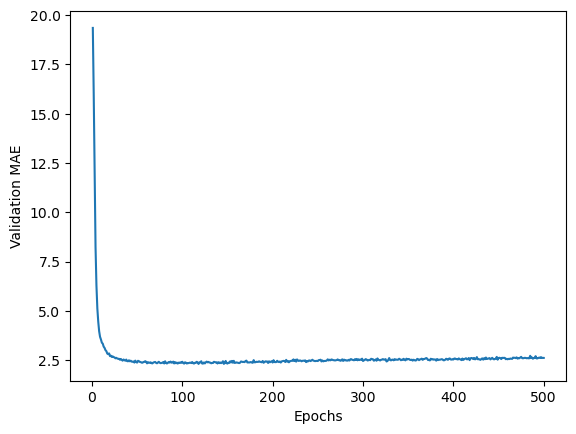

In [64]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Shua- From the graph, we can see that the validation MAE stops improving very early on.

**Plotting validation scores, excluding the first 10 data points**

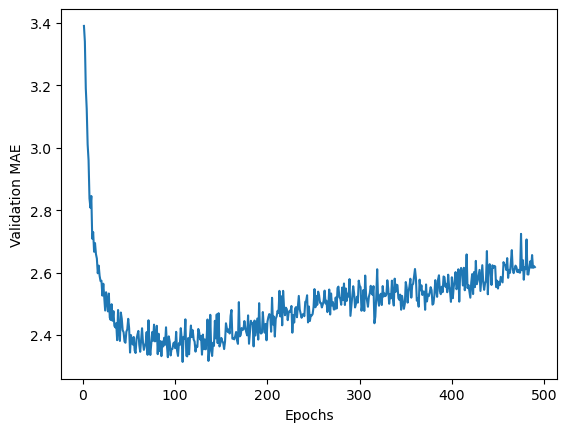

In [65]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [66]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 6ms/step - loss: 16.6802 - mae: 2.6765


In [67]:
test_mae_score

2.6764750480651855

### Generating predictions on new data

In [68]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([7.752964], dtype=float32)

## Summary- Shua

We saw how to use Keras to build a simple neural network for several different problems, such as classification, regression, and multiclass classification.

We also how to use K-fold cross-validation to evaluate our model, and how to use the validation set approach to fine-tune our model.

In playing with various hyperparameters, we saw how there is no set of hyperparameters that will always work best for every problem-- each area requires its own experimentation and engineering

### ANOTHER ATTEMPT

Lets run it again, this time lowering the learning rate to try and get a smoother validation loss, as well as expanding the parameters of the second layer to 128

In [91]:
from tensorflow.keras.optimizers import Adam
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [81]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [82]:
all_scores

[2.7782442569732666, 3.4521114826202393, 3.124164342880249, 3.579296827316284]

In [83]:
np.mean(all_scores)

3.2334542274475098

**Saving the validation logs at each fold**

In [84]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [85]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

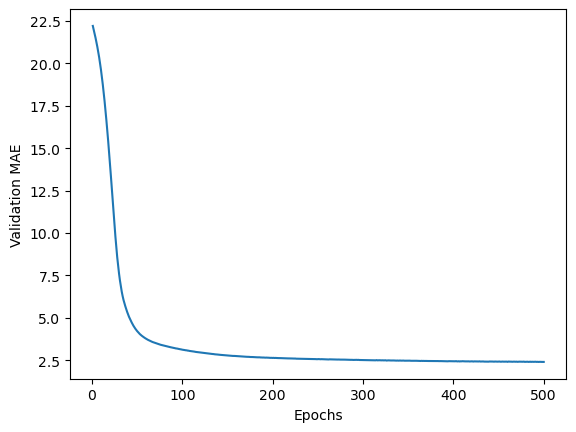

In [86]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

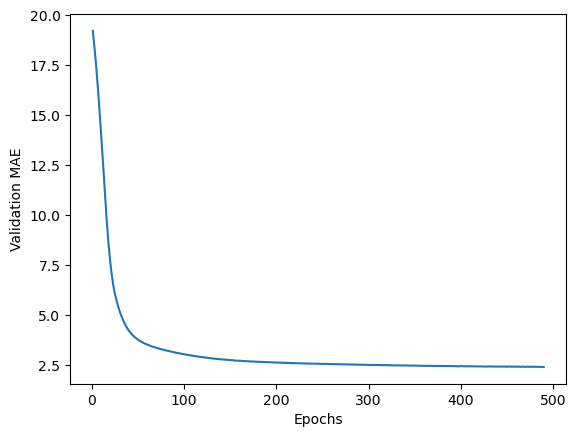

In [87]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [88]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 24.7045 - mae: 3.3230


In [89]:
test_mae_score

3.323016881942749

### Generating predictions on new data

In [90]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([7.389039], dtype=float32)